In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
data = pd.read_csv("../data/raw/Ecommerce_Sales_Prediction_Dataset.csv")

In [117]:
data.head()

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
0,01-01-2023,Sports,932.80,35.82,Occasional,6780.38,32
1,02-01-2023,Toys,569.48,3.60,Premium,6807.56,16
2,03-01-2023,Home Decor,699.68,3.56,Premium,3793.91,27
3,04-01-2023,Toys,923.27,0.61,Premium,9422.75,29
4,05-01-2023,Toys,710.17,47.83,Premium,1756.83,17


In [119]:
#checking to see if there are any null values
data.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1000 non-null   object 
 1   Product_Category  1000 non-null   object 
 2   Price             1000 non-null   float64
 3   Discount          1000 non-null   float64
 4   Customer_Segment  1000 non-null   object 
 5   Marketing_Spend   1000 non-null   float64
 6   Units_Sold        1000 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB


In [121]:
print("Range of dates:",data["Date"].min(),"to",data["Date"].max())
print("----------")
print(data["Product_Category"].value_counts())
print("----------")
print(data["Customer_Segment"].value_counts())

Range of dates: 01-01-2023 to 31-12-2024
----------
Product_Category
Electronics    210
Sports         206
Toys           204
Home Decor     190
Fashion        190
Name: count, dtype: int64
----------
Customer_Segment
Regular       345
Occasional    339
Premium       316
Name: count, dtype: int64


In [123]:
print("all values in below columns are unique")
for column in data.columns:
    if data[column].is_unique:
        print(column)

all values in below columns are unique
Date
Marketing_Spend


In [125]:
#Checking to see if there are any duplicate rows
print("duplicate rows:",data.duplicated().sum())

duplicate rows: 0


In [127]:
data.describe()

,Price,Discount,Marketing_Spend,Units_Sold
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,505.241920,24.919750,4912.830240,29.631000
std,289.791248,14.439951,2840.602656,7.267989
min,14.590000,0.010000,100.300000,5.000000
25%,243.342500,12.995000,2413.020000,24.000000
50%,509.310000,24.965000,4837.245000,30.000000
75%,747.592500,37.562500,7319.675000,34.000000
max,999.420000,49.920000,9995.620000,57.000000


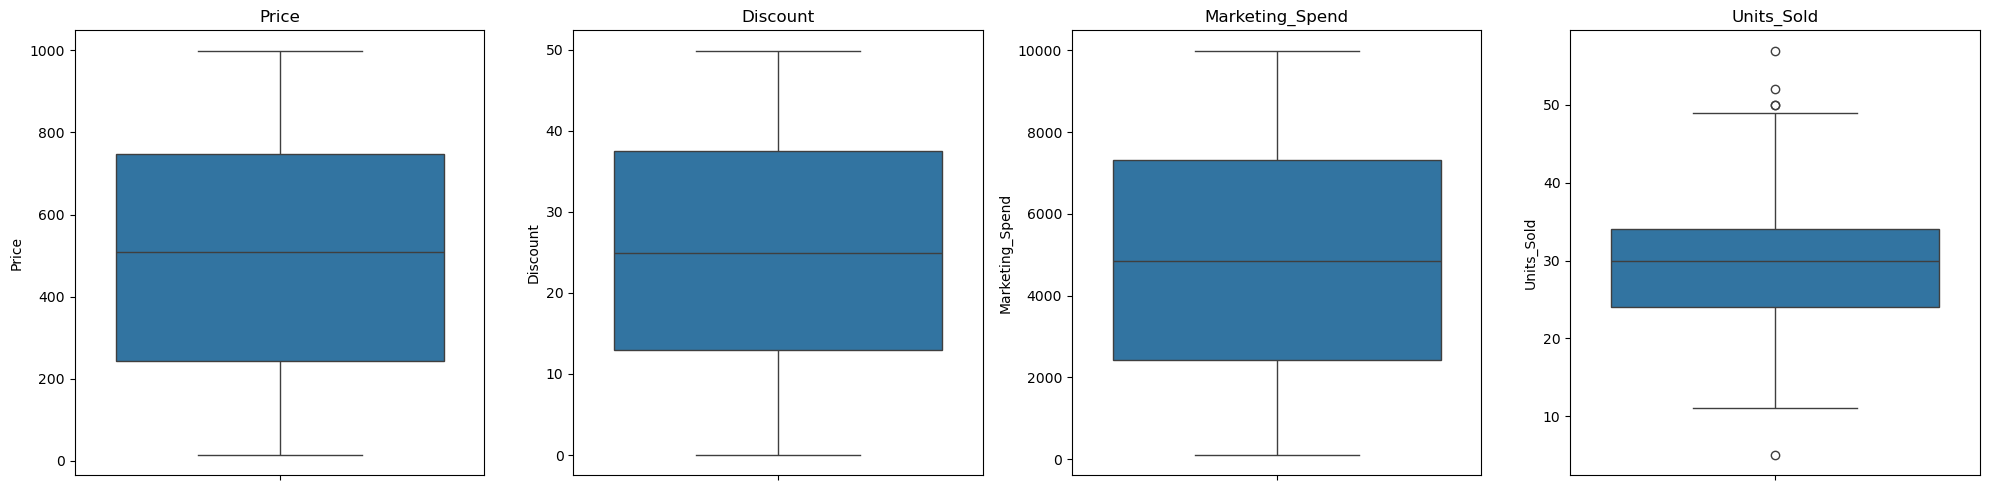

In [129]:
cols = ['Price', 'Discount', 'Marketing_Spend', 'Units_Sold']
n = len(cols)

fig, axes = plt.subplots(1, n, figsize=(5 * n, 5))

for i, col in enumerate(cols):
    sns.boxplot(y=data[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [131]:
#checking the rows with outliers for Units_Sold
data[(data["Units_Sold"] > 50) | (data["Units_Sold"] < 10)]

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
261,19-09-2023,Home Decor,407.91,20.59,Occasional,7091.84,5
522,06-06-2024,Sports,90.81,21.09,Occasional,7123.44,52
641,03-10-2024,Toys,707.63,17.02,Occasional,4837.43,57
